# Statistical characterisation of probability distributions

**Authors**: Andreas Kruff, Johann Schaible, Marcos Oliveira

**Version**: 11.05.2020

**Description**: This tutorial is based on the statistical characterization tutorial and should show you how to use the powerlaw package in combination with the face2face package with "real data". It should teach you how to set the parameters based on a given data set and how to visualize it correctly. 

For more information about the methods that are explained in this tutorial you can check out the online documentation of this toolbox here:

https://gesiscss.github.io/face2face_public/

The cell below can be ignored, after being executed once. The path has to be set to the directory above to get access to the data and the functions of this libary.

In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [14]:
from face2face.imports.load_all_data import Data

df = Data("SFHH09")

If you already did the "probability_distribution_contact_duration" tutorial you might remember that the functions of this package have a second return value that we haven't used yet. This value is a list that contains every $\Delta t$ of the used datasets. We are going to use this lists that for this tutorial.

In [15]:
from face2face.statistics.distribution import *

In [16]:
x_y_list, delta_t_list = calculate_contact_duration(df)

Like we have seen in the "statistical_characterization" tutorial you can choose the xmin value for the powerlaw package manually or you can let the function find the xmin value automatically. However if you want to set a xmax value you have to do this manually.
To find reasonable values for xmin and xmax manually my advice is to take the data set you want to analyze and plot it at first.

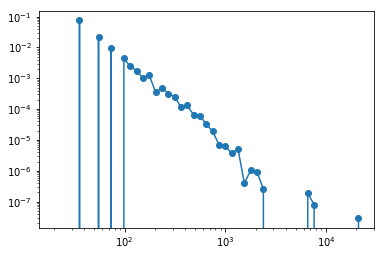

In [17]:
import matplotlib.pyplot as plt

plt.plot(x_y_list[1], x_y_list[0], marker="o")
plt.yscale("log")
plt.xscale("log")

If you plot the contact duration with the probability on the y-axis and $\Delta t$ values on the x-axis and use logarithmic scaled axis we can see where the remarkable parts of this plot can be localized. In the beginning of the plot he is very linear and not very interesting for analysing. Later at the end of the plot the plot is pretty much linear and parallel to the x-axis, which is also not very interesting to analyse in terms of the underlying distribution. Thats why we want to specify the interesting part for the fit object. In this case the interesting part is approximately located between the middle of $10^2$ and $10^3 \approx$ 500 and closely before $10^3 \approx$ 900.

In [8]:
import powerlaw
fit = powerlaw.Fit(delta_t_list, xmin=500, xmax=900)

As you can see below the estimated xmin value was pretty close to the automatically calculated xmin value from the powerlaw package. The xmax value was not generated automatically as you can see.

In [9]:
fit_auto = powerlaw.Fit(delta_t_list)
fit_auto.xmin, fit_auto.xmax

Calculating best minimal value for power law fit


(520.0, None)

Because the data set includes values with a time scale we have a continous data set, so we don't have to think about the approximation of a discret data set. **NEEDS TO BE CORRECTED. IT SHOULD BE DISCRET**

You should know that a strict power law cannot be a probability distribution. Instead we can create a truncated power function, that is true for a part of the data set. $p(x) = C x^{-\alpha}$ for $x>x_{min}$. The exponent $\alpha$ must be bigger than 1 and is typically in the range of $2<\alpha<3$.

A good way to set the alpha parameter is to use the parameter_range parameter that we introduced in the "statistical_characterization" tutorial.

In [19]:
parameter_range={"alpha": [2, 3], "sigma": [None, .2]}

fit_set_alpha = powerlaw.Fit(delta_t_list, parameter_range=parameter_range)

Calculating best minimal value for power law fit


Obviously it gets harder to create a fit object if you define more parameter ranges in the dictionary. As you can see below, the xmin value needed to be reduced so that an $\alpha$ value between 2 and 3 can be achieved.

In [20]:
fit_set_alpha.alpha, fit_set_alpha.xmin,fit.xmax

(2.9999915167681497, 320.0, 900.0)

After we determined reasonable values for xmin and xmax (alpha, sigma), we can use the check_distribution method from the face2face toolbox to determine the best fitting distribution that is included in the powerlaw package.

In [22]:
from face2face.statistics.check_distribution import search_best_fit_distribution

fit_obj, tupel_list, best_fit = search_best_fit_distribution(delta_t_list, xmin=500, xmax=900, discret=False)

The best fitting distribution is stretched_exponential


Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions
Assuming nested distributions


As you can see in the output above the function prints out which distribution fits best to the fit object that was created based on your parameter. In the cell below you can see the loglikelihood ratio for every combination of distribution comparisons.

In [55]:
print(tupel_list)

[(3.4004612817112188, 'lognormal', 'power_law'), (2.110821415234564, 'lognormal', 'exponential'), (2.2932721742320847, 'lognormal', 'truncated_power_law'), (6.409650982779138, 'exponential', 'power_law'), (4.533446074372794, 'exponential', 'truncated_power_law'), (6.841389417343493, 'truncated_power_law', 'power_law'), (3.7036678597339376, 'stretched_exponential', 'power_law'), (2.670045616377132, 'stretched_exponential', 'lognormal'), (2.6006000854420175, 'stretched_exponential', 'exponential'), (2.7400833954709114, 'stretched_exponential', 'truncated_power_law'), (2.670045616377132, 'stretched_exponential', 'lognormal_positive'), (3.4004612817112188, 'lognormal_positive', 'power_law'), (2.110821415234564, 'lognormal_positive', 'exponential'), (2.2932721742320847, 'lognormal_positive', 'truncated_power_law')]


For the plotting you have to consider which of the three functions that were described in the "statistical_characterization" fits best (pdf,cdf,ccdf). Because of the fact that an exponential distribution fits better to the selected data than a powerlaw as you can see above the data set seems to be not heavy tailed. This is because an exponential distribution is the absolut minimum alternative to evaluate a heavy-tailedness, but the typical quantitative definition of a "heavy-tail" is that it is not exponentially bounded. Another reason why pdf is better for plotting this data set is, because we set a xmax value. The problem is that while the pdf appear in a straight line, cdf and ccdf will bend down rather quickly the closer they get to the xmax value.

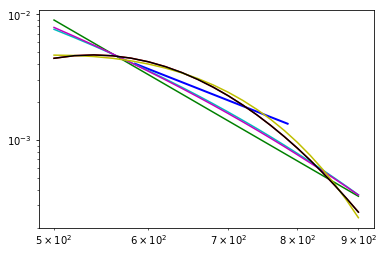

In [23]:
fig = fit_obj.plot_pdf(color = "b", linewidth =2)
fit_obj.power_law.plot_pdf(color = "g", linestyle = "-", ax = fig)
fit_obj.lognormal.plot_pdf(color = "r", linestyle = "-", ax = fig)
fit_obj.exponential.plot_pdf(color = "c", linestyle = "-", ax = fig)
fit_obj.truncated_power_law.plot_pdf(color = "m", linestyle = "-", ax = fig)
fit_obj.stretched_exponential.plot_pdf(color = "y", linestyle = "-", ax = fig)
fit_obj.lognormal_positive.plot_pdf(color = "k", linestyle = "-", ax = fig)

In the result you can see that the area between the empirical (blue) data set and the stretched_exponential distribution (yellow) is the smallest and thats why it's the best fit for the specified parameters.